In [ ]:
import os
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

os.chdir("drive/My Drive/Project_active/HCS-TT")
os.listdir()

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


['TMC_Definition.csv',
 'HERE_DA_126776_00000.csv',
 'GIS_features.csv',
 'Exercise',
 'GIS',
 'TT Prediction.gslides',
 'HERE_DA_126853_00000.csv',
 'M1_Regu.ipynb',
 'Descriptive Stats_7 Days.ipynb']

In [ ]:
import torch 
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
# data_tt = pd.read_csv(r'HERE_DA_126776_00000.csv') # len(np.unique(data_tt['TMC'])) # 6308 links
data_tt = pd.read_csv('HERE_DA_126853_00000.csv')
data_tt.head()

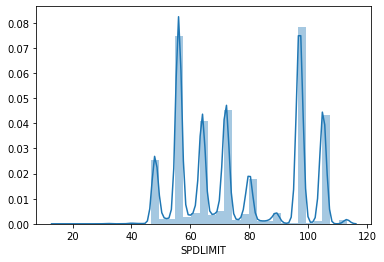

In [ ]:
# Speed Limit Distribution
sns.distplot(data_tt['SPDLIMIT'], bins=35, kde=True, rug=False);
# data_tt['SPDLIMIT'].value_counts()

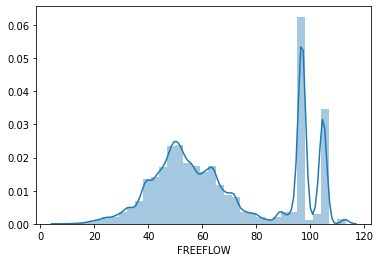

In [ ]:
# Free flow Distribution
sns.distplot(data_tt['FREEFLOW'], bins=35, kde=True, rug=False);

Text(0, 0.5, 'Speed Limit')

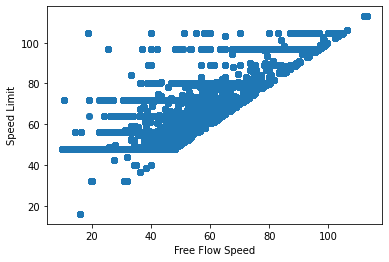

In [ ]:
# Speed limit & free flow
plt.scatter(data_tt['FREEFLOW'],data_tt['SPDLIMIT'], marker='o')
plt.xlabel('Free Flow Speed')
plt.ylabel('Speed Limit')

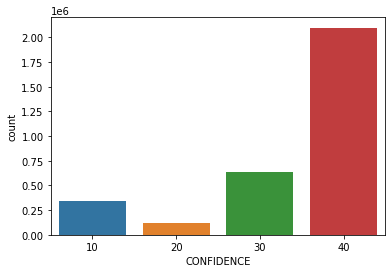

In [ ]:
sns.countplot(x='CONFIDENCE', data=data_tt)

In [ ]:
data_tt['datetime'] = pd.to_datetime(data_tt['DATE-TIME'], errors='coerce')
data_tt.head()

,TMC,DATE-TIME,EPOCH-5MIN,LENGTH,FREEFLOW,SPDLIMIT,COUNT,MEAN,STDDEV,MIN,MAX,CONFIDENCE,datetime
0,112N04126,2020-08-17 00:10,2,1873,97.0,97.0,7,94.0,0.0,94,94,40,2020-08-17 00:10:00
1,112N04126,2020-08-17 00:25,5,1873,97.0,97.0,5,106.6,7.8,95,112,40,2020-08-17 00:25:00
2,112N04126,2020-08-17 00:30,6,1873,97.0,97.0,14,111.3,8.4,102,120,40,2020-08-17 00:30:00
3,112N04126,2020-08-17 00:35,7,1873,97.0,97.0,1,102.0,0.0,102,102,10,2020-08-17 00:35:00
4,112N04126,2020-08-17 00:50,10,1873,97.0,97.0,8,108.6,1.1,106,109,40,2020-08-17 00:50:00


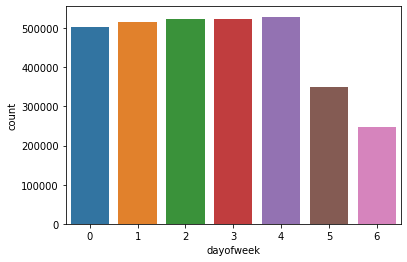

In [ ]:
# number of records by day of week (theory=60/5*24*6308=288*6308=1816704)
data_tt['dayofweek'] = data_tt['datetime'].dt.dayofweek
data_tt.head() # It is assumed the week starts on Monday, which is denoted by 0 and ends on Sunday which is denoted by 6.
sns.countplot(x='dayofweek', data=data_tt)

In [ ]:
# Percentage of counts
500000/1816704

0.27522370182484324

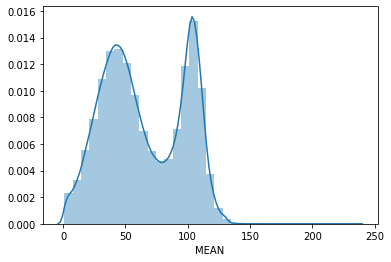

In [ ]:
# Mean speed distribution - unit should be mph
sns.distplot(data_tt['MEAN'], bins=35, kde=True, rug=False);

In [ ]:
# aggregate (take mean of all TMC) speed by time
data_tt_aggsp = data_tt.groupby('datetime', as_index=False).agg({"MEAN": "mean","FREEFLOW":"mean","SPDLIMIT":"mean"})
data_tt_aggsp.head()

,datetime,MEAN,FREEFLOW,SPDLIMIT
0,2020-08-17 00:00:00,76.093789,75.749068,81.948101
1,2020-08-17 00:05:00,76.213971,75.973775,81.859753
2,2020-08-17 00:10:00,75.271154,75.671978,82.294150
3,2020-08-17 00:15:00,69.461658,73.440415,80.446809
4,2020-08-17 00:20:00,78.982381,77.091905,83.168116


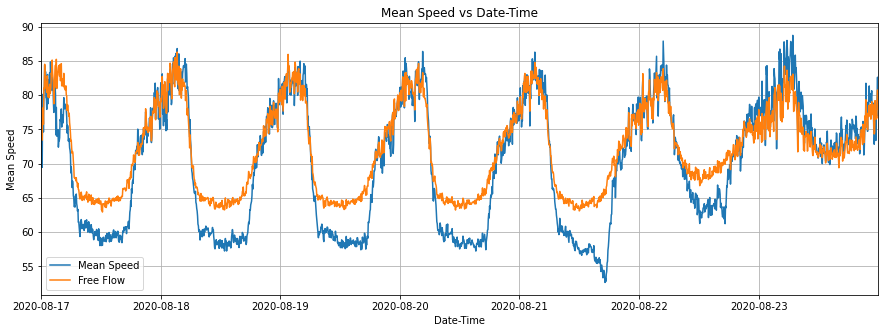

In [ ]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.title('Mean Speed vs Date-Time')
plt.ylabel('Mean Speed')
plt.xlabel('Date-Time')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(data_tt_aggsp['datetime'], data_tt_aggsp['MEAN'], label='Mean Speed')
plt.plot(data_tt_aggsp['datetime'], data_tt_aggsp['FREEFLOW'], label='Free Flow')
plt.legend()

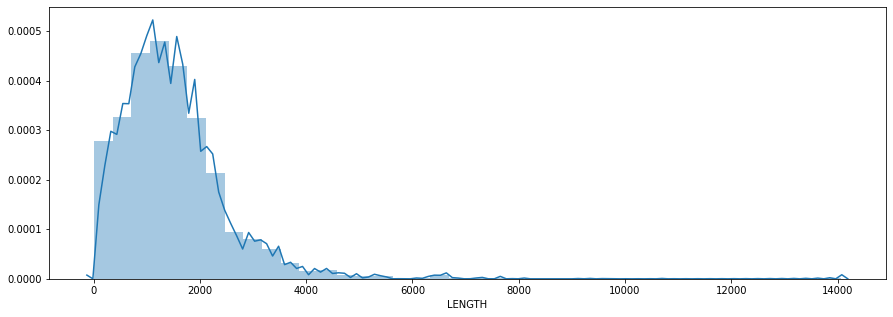

In [ ]:
# link length distribution - unit should be feet
sns.distplot(data_tt['LENGTH'], bins=40, kde=True, rug=False);

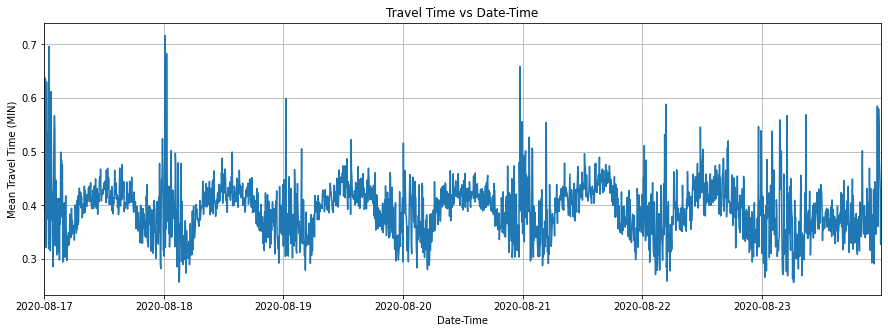

In [ ]:
# aggregate (take mean of all TMC) travel time by time
data_tt['tt'] = data_tt['LENGTH']*0.000189394/data_tt['MEAN']*60

data_tt_aggsp = data_tt.groupby('datetime', as_index=False).agg({"tt": "mean"})
data_tt_aggsp.head()

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.title('Travel Time vs Date-Time')
plt.ylabel('Mean Travel Time (MIN)')
plt.xlabel('Date-Time')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(data_tt_aggsp['datetime'], data_tt_aggsp['tt'])

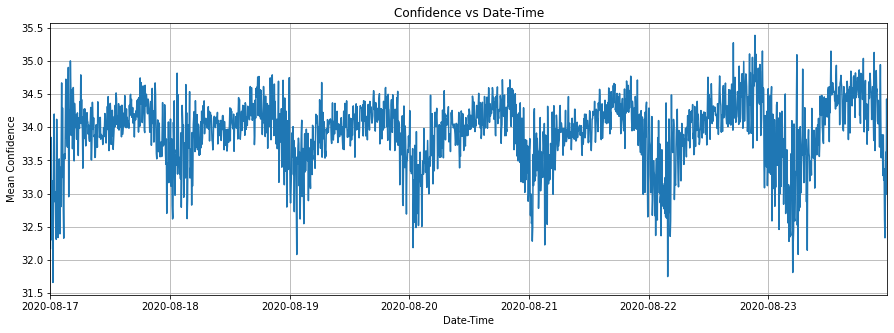

In [ ]:
# aggregate (take mean of all TMC) confidence by time
data_tt_aggsp = data_tt.groupby('datetime', as_index=False).agg({"CONFIDENCE": "mean"})
data_tt_aggsp.head()

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size
plt.title('Confidence vs Date-Time')
plt.ylabel('Mean Confidence')
plt.xlabel('Date-Time')
plt.grid(True)
plt.autoscale(axis='x',tight=True)
plt.plot(data_tt_aggsp['datetime'], data_tt_aggsp['CONFIDENCE'])

In [ ]:
# Important library for many geopython libraries
!apt install gdal-bin python-gdal python3-gdal 
# Install rtree - Geopandas requirment
!apt install python3-rtree 
# Install Geopandas
!pip install git+git://github.com/geopandas/geopandas.git
# Install descartes - Geopandas requirment
!pip install descartes 
# Install Folium for Geographic data visualization
!pip install folium
# Install plotlyExpress
!pip install plotly_express

In [ ]:
data_TMC = pd.read_csv(r'TMC_Definition.csv')
data_TMC.head()
# data_TMC.ADMIN2.value_counts()

,ADMIN1,ADMIN2,ADMIN3,ADMIN4,ADMIN5,TMC,TMC_LENGTH,LINEAR,PARENT_LIN,TMC_ORDER,ROAD_NAME,ROAD_NUM,ROAD_DIR,POINT_DESC,TMC_TYPE,POS_OFF,NEG_OFF,START_LAT,START_LON,END_LAT,END_LON
0,United States,Texas,Morris,Uninc Morris County,NaN,111P10110,3.474496,111P00609,NaN,19,E Main St,US-67,Eastbound,FM-161/Daingerfield St,1,111P07651,111P07650,33.18136,-94.73246,33.20240,-94.68152
1,United States,Texas,Cass,Uninc Cass County,NaN,111P10111,4.921342,111P00609,NaN,21,NaN,US-67,Eastbound,CR-4307,1,111P10112,111P07651,33.20958,-94.67279,33.25919,-94.61341
2,United States,Texas,Bowie,Uninc Bowie County,NaN,111P10112,5.138992,111P00609,NaN,22,NaN,US-67,Eastbound,FM-990,1,111P07652,111P10111,33.25919,-94.61341,33.31661,-94.56096
3,United States,Florida,Osceola,Uninc Osceola County,NaN,102P55871,0.019618,102P55870,NaN,0,NaN,NaN,SR-417-TOLL/Central Florida Greeneway Southbound,NaN,2,0,0,28.34211,-81.51818,28.34188,-81.51837
4,United States,Texas,Bowie,Uninc Bowie County,NaN,111P10113,3.051925,111P00609,NaN,24,NaN,US-67,Eastbound,CR-4126/FM-2149,1,111P07653,111P07652,33.35027,-94.50680,33.33800,-94.45673


In [ ]:
data_HSTMC = data_TMC[data_TMC['ADMIN2'] == 'Texas']
# data_HSTMC.ADMIN3.value_counts()
data_HSTMC = data_TMC[data_TMC['ADMIN3'] == 'Harris']

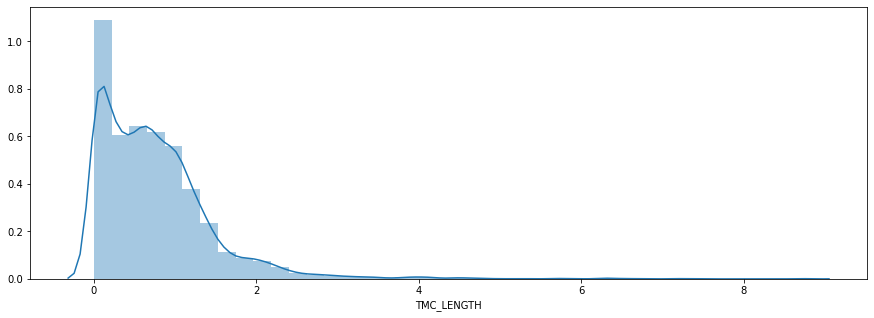

In [ ]:
# link length distribution - unit should be miles
sns.distplot(data_HSTMC['TMC_LENGTH'], bins=40, kde=True, rug=False);

In [ ]:
# HS_TMC = np.unique(data_HSTMC['TMC'])
HS_TMC = np.unique(data_tt['TMC']) # # of different links in Houston

In [ ]:
import geopandas as gpd
data_TXshp = gpd.read_file('GIS/TMC_GEO.shp')
data_TXshp.head()

,TMC,LINK_ID,DIR_TRAVEL,CONTRACC,FUNCLASS,geometry
0,115N10508,84861076,T,N,4,"LINESTRING (-106.49508 31.77081, -106.49418 31..."
1,115N10508,910691611,T,N,4,"LINESTRING (-106.48802 31.77722, -106.48803 31..."
2,115N10508,1217322515,T,N,4,"LINESTRING (-106.49554 31.77052, -106.49528 31..."
3,115N10508,1123608311,T,N,4,"LINESTRING (-106.49028 31.77420, -106.49022 31..."
4,115N10508,1191609353,T,N,4,"LINESTRING (-106.49249 31.77246, -106.49218 31..."


In [ ]:
# data_HS = data_TXshp[data_TXshp.TMC.str[:3].isin(['112'])] # 3514632 rows
data_HS = data_TXshp[data_TXshp.TMC.isin(HS_TMC)] 
data_HS.head()

,TMC,LINK_ID,DIR_TRAVEL,CONTRACC,FUNCLASS,geometry
711,112N12031,17907560,T,N,4,"LINESTRING (-95.38129 29.75327, -95.38116 29.7..."
712,112N12031,1254537684,T,N,4,"LINESTRING (-95.38923 29.75339, -95.38908 29.7..."
713,112N12031,1254319296,T,N,4,"LINESTRING (-95.38862 29.75340, -95.38853 29.7..."
714,112N12031,126611428,T,N,4,"LINESTRING (-95.39206 29.75334, -95.39161 29.7..."
715,112N12031,1254319981,T,N,4,"LINESTRING (-95.38832 29.75341, -95.38820 29.7..."


In [ ]:
len(np.unique(data_HS.TMC))

6300

In [ ]:
try:
  import contextily as ctx # import
except:
  !apt install libproj-dev proj-data proj-bin
  !apt install libgeos-dev
  !pip install cython
  !pip install cartopy
  !pip install contextily==1.0rc1 --no-use-pep517 --no-cache-dir
import contextily as ctx # library for providing background maps

In [ ]:
data_HS = data_HS.to_crs(epsg=3857)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


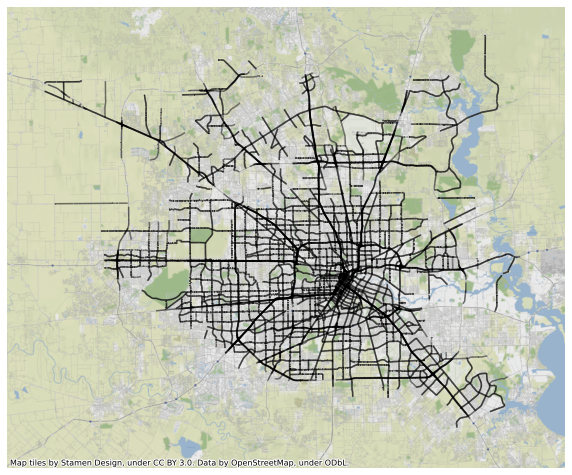

In [ ]:
ax = data_HS.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, zoom=13)
ax.set_axis_off()

In [ ]:
# Delete weekends' data
data_tt_sub = data_tt[data_tt['dayofweek'].isin([0,1,2,3,4])]

# Aggregate by TMC!
data_tt_sub = data_tt_sub[['TMC','MEAN','datetime',"SPDLIMIT","FREEFLOW"]]
data_tt_aggsp = data_tt_sub.groupby('TMC', as_index=False).agg({"MEAN": "mean","SPDLIMIT":"mean","FREEFLOW":"mean"})
data_tt_aggsp.head()

,TMC,MEAN,SPDLIMIT,FREEFLOW
0,112N04118,109.261909,105.0,105.0
1,112N04119,111.236833,105.0,105.0
2,112N04120,110.057881,105.0,105.0
3,112N04121,110.355242,105.0,105.0
4,112N04122,107.728236,103.4,103.4


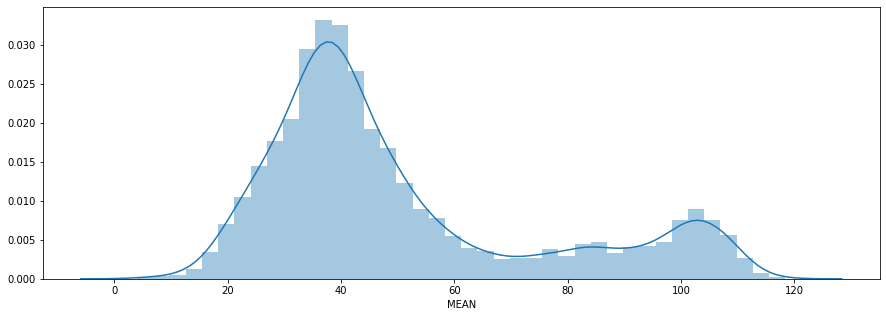

In [ ]:
# aggregate speed (by TMC, taking average of 5 days, 24 hours/day) distribution
sns.distplot(data_tt_aggsp['MEAN'], bins=40, kde=True, rug=False);

In [ ]:
data_tt_aggsp = pd.merge(data_HS, data_tt_aggsp, how='left', on='TMC')
data_tt_aggsp.head()

,TMC,LINK_ID,DIR_TRAVEL,CONTRACC,FUNCLASS,geometry,MEAN
0,112N12031,17907560,T,N,4,"LINESTRING (-10617796.634 3471874.265, -106177...",29.166452
1,112N12031,1254537684,T,N,4,"LINESTRING (-10618680.511 3471889.651, -106186...",29.166452
2,112N12031,1254319296,T,N,4,"LINESTRING (-10618612.606 3471890.934, -106186...",29.166452
3,112N12031,126611428,T,N,4,"LINESTRING (-10618995.545 3471883.240, -106189...",29.166452
4,112N12031,1254319981,T,N,4,"LINESTRING (-10618579.210 3471892.216, -106185...",29.166452


In [ ]:
bound = data_tt_aggsp.total_bounds

xlim = ([bound[0],  bound[2]])
ylim = ([bound[1],  bound[3]])

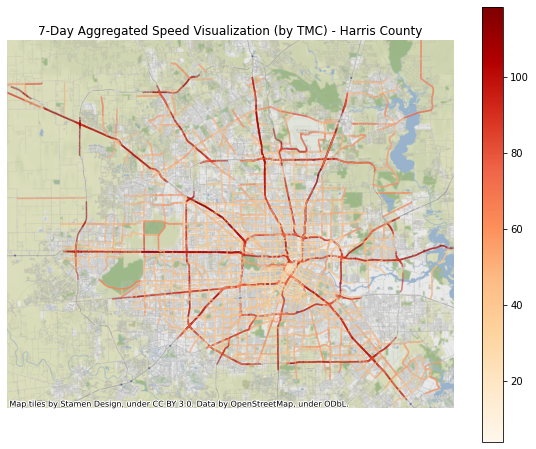

In [ ]:
ax = data_tt_aggsp.plot(figsize=(10, 8), 
                        alpha=0.5, 
                        column=data_tt_aggsp['MEAN'], cmap='OrRd', # https://geopandas.org/mapping.html
                        legend=True)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ctx.add_basemap(ax, zoom=13)
ax.set(title='7-Day Aggregated Speed Visualization (by TMC) - Harris County')
ax.set_axis_off()

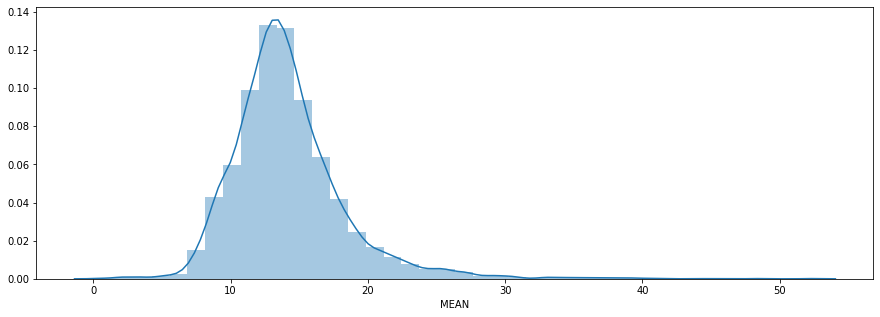

In [ ]:
# Standard deviation when average speed across all links
data_tt_sub = data_tt[['TMC','MEAN','datetime']]
data_tt_aggsp = data_tt_sub.groupby('TMC', as_index=False).agg({"MEAN": "std"})
data_tt_aggsp.head()
sns.distplot(data_tt_aggsp['MEAN'], bins=40, kde=True, rug=False); # For some TMC, speed varied a lot from off-peak to peak

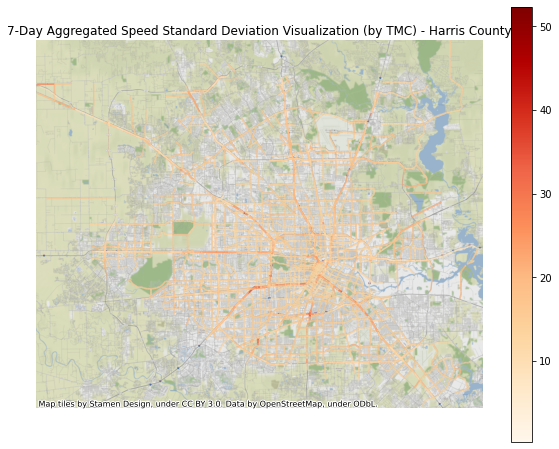

In [ ]:
data_tt_aggsp = pd.merge(data_HS, data_tt_aggsp, how='left', on='TMC')
data_tt_aggsp.head()
bound = data_tt_aggsp.total_bounds

xlim = ([bound[0],  bound[2]])
ylim = ([bound[1],  bound[3]])
ax = data_tt_aggsp.plot(figsize=(10, 8), 
                        alpha=0.5, 
                        column=data_tt_aggsp['MEAN'], cmap='OrRd', # https://geopandas.org/mapping.html
                        legend=True)
ax.set_xlim(xlim)
ax.set_ylim(ylim)
ctx.add_basemap(ax, zoom=13)
ax.set(title='7-Day Aggregated Speed Standard Deviation Visualization (by TMC) - Harris County')
ax.set_axis_off() # Some links have large time standard deviations (min), might because they are more congested/unreliable

In [ ]:
# Speed limit and function class relationship
data_tt_aggsp = pd.merge(data_tt_aggsp, data_HS, how='left', on='TMC')
data_tt_aggsp.head()

,TMC,MEAN,SPDLIMIT,FREEFLOW,LINK_ID,DIR_TRAVEL,CONTRACC,FUNCLASS,geometry
0,112N04118,109.261909,105.0,105.0,1.170066e+09,T,Y,2.0,"LINESTRING (-95.14573 29.54464, -95.14665 29.5..."
1,112N04118,109.261909,105.0,105.0,1.268979e+09,T,Y,2.0,"LINESTRING (-95.14362 29.54241, -95.14397 29.5..."
2,112N04118,109.261909,105.0,105.0,1.268979e+09,T,Y,2.0,"LINESTRING (-95.14502 29.54391, -95.14503 29.5..."
3,112N04118,109.261909,105.0,105.0,8.305972e+08,T,Y,2.0,"LINESTRING (-95.13952 29.53799, -95.13968 29.5..."
4,112N04118,109.261909,105.0,105.0,1.169753e+09,T,Y,2.0,"LINESTRING (-95.14074 29.53935, -95.14148 29.5..."


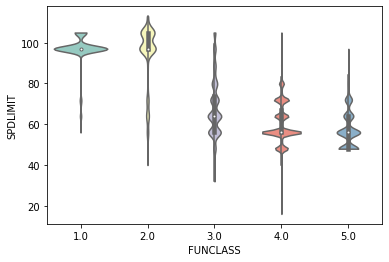

In [ ]:
sns.violinplot(x=data_tt_aggsp['FUNCLASS'],y=data_tt_aggsp['SPDLIMIT'],cut=0,palette="Set3")

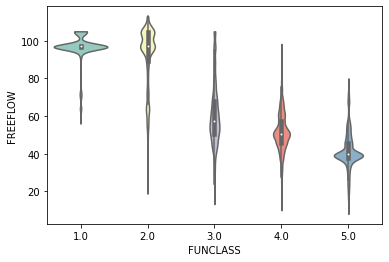

In [ ]:
sns.violinplot(x=data_tt_aggsp['FUNCLASS'],y=data_tt_aggsp['FREEFLOW'],cut=0,palette="Set3")

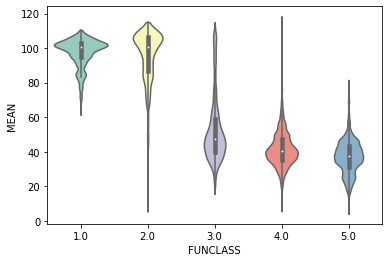

In [ ]:
sns.violinplot(x=data_tt_aggsp['FUNCLASS'],y=data_tt_aggsp['MEAN'],cut=0,palette="Set3")